# 95. サブワード化
トークンの単位を単語や形態素からサブワードに変更し，91-94の実験を再度実施せよ．

## GPU prepare
1. 使用可能GPUの確認
2. GPUの指定
3. PyTorchで利用できるGPU数の確認

In [1]:
# 使用可能GPUの確認
!nvidia-smi

Fri Aug  5 16:51:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    On   | 00000000:01:00.0 Off |                  Off |
| 30%   32C    P8    24W / 300W |      8MiB / 48685MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A6000    On   | 00000000:25:00.0 Off |                  Off |
| 34%   

In [2]:
# GPUの指定
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' #0番を使用するとき

In [3]:
# 確認
import torch
print(torch.cuda.device_count()) #Pytorchで使用できるGPU数を取得

1


## トークン化 (90相当)
1. 日本語のトークン化関数 (サブワード)
2. 英語のトークン化関数 (サブワード)
3. テキストのトークン化, 保存

In [4]:
# 日本語のサブワード分割
import sentencepiece as spm

# サブワード分割のTrain
spm.SentencePieceTrainer.Train(
    '--input=../data/ch10/kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=../data/ch10/95_sp_model_ja --vocab_size=16000 --character_coverage=0.9995 --pad_id=3'
)

# 日本語のサブワード分割用インスタンス
sp_ja = spm.SentencePieceProcessor()

# Trainしたモデルをロード
sp_ja.Load('../data/ch10/95_sp_model_ja.model')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=../data/ch10/kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=../data/ch10/95_sp_model_ja --vocab_size=16000 --character_coverage=0.9995 --pad_id=3
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../data/ch10/kftt-data-1.0/data/orig/kyoto-train.ja
  input_format: 
  model_prefix: ../data/ch10/95_sp_model_ja
  model_type: UNIGRAM
  vocab_size: 16000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  ha

True

num_tokens=7770269 num_tokens/piece=89.1076
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=87201 obj=146.853 num_tokens=7771254 num_tokens/piece=89.1189
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=65400 obj=150.704 num_tokens=8061533 num_tokens/piece=123.265
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=65400 obj=149.975 num_tokens=8063918 num_tokens/piece=123.301
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=49050 obj=154.078 num_tokens=8376373 num_tokens/piece=170.772
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=49050 obj=153.295 num_tokens=8377709 num_tokens/piece=170.799
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=36787 obj=157.671 num_tokens=8711083 num_tokens/piece=236.798
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=36787 obj=156.827 num_tokens=8711831 num_tokens/piece=236.818
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=27590 obj=161.517 num_tokens=9079741 num_tokens/pi

In [14]:
# 英語のサブワード分割
# サブワード分割のTrain
spm.SentencePieceTrainer.Train(
    '--input=../data/ch10/kftt-data-1.0/data/orig/kyoto-train.en --model_prefix=../data/ch10/95_sp_model_en --vocab_size=16000 --character_coverage=0.9995 --pad_id=3'
)

# 英語のサブワード分割用インスタンス
sp_en = spm.SentencePieceProcessor()

# Trainしたモデルをロード
sp_en.Load('../data/ch10/95_sp_model_en.model')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=../data/ch10/kftt-data-1.0/data/orig/kyoto-train.en --model_prefix=../data/ch10/95_sp_model_en --vocab_size=16000 --character_coverage=0.9995 --pad_id=3
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../data/ch10/kftt-data-1.0/data/orig/kyoto-train.en
  input_format: 
  model_prefix: ../data/ch10/95_sp_model_en
  model_type: UNIGRAM
  vocab_size: 16000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  ha

True

In [15]:
# テキストをトークン列に変換, 保存
import torch

def tokenizer(fname_org, fname_tok, sp):
    with open(fname_org, encoding='utf-8') as f:
        lines = f.readlines()
    
    tokens = [' '.join(sp.EncodeAsPieces(line)) + '\n' for line in lines]

    with open(fname_tok, 'w') as f:
        f.writelines(tokens)

tokenizer('../data/ch10/kftt-data-1.0/data/orig/kyoto-train.ja', '../data/ch10/95_train_tokens.ja', sp_ja)
tokenizer('../data/ch10/kftt-data-1.0/data/orig/kyoto-dev.ja', '../data/ch10/95_dev_tokens.ja', sp_ja)
tokenizer('../data/ch10/kftt-data-1.0/data/orig/kyoto-test.ja', '../data/ch10/95_dev_test.ja', sp_ja)
tokenizer('../data/ch10/kftt-data-1.0/data/orig/kyoto-train.en', '../data/ch10/95_train_tokens.en', sp_en)
tokenizer('../data/ch10/kftt-data-1.0/data/orig/kyoto-dev.en', '../data/ch10/95_dev_tokens.en', sp_en)
tokenizer('../data/ch10/kftt-data-1.0/data/orig/kyoto-test.en', '../data/ch10/95_dev_test.en', sp_en)

## 翻訳モデルの訓練 (91相当)
1. データの前処理
2. モデルの訓練

In [16]:
# 前処理
!fairseq-preprocess -s ja -t en \
    --trainpref ../data/ch10/95_train_tokens \
    --validpref ../data/ch10/95_dev_tokens \
    --destdir ../data/ch10/95_preprocessed \
    --thresholdsrc 5 \
    --thresholdtgt 5 \
    --workers 20

2022-08-05 17:14:24 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:14:24 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='../data/ch10/95_preprocessed', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/pl

In [17]:
# モデルの訓練
!fairseq-train ../data/ch10/95_preprocessed \
    --save-dir ../data/ch10/95_trained \
    --arch transformer --share-decoder-input-output-embed \
    --lr-scheduler inverse_sqrt --warmup-updates 2000 --warmup-init-lr 1e-7 \
    --lr 1e-3 \
    --dropout 0.2 \
    --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --optimizer adam --clip-norm 1.0 \
    --max-tokens 8000 \
    --max-epoch 20 \
    --fp16

2022-08-05 17:25:12 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:25:14 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': Fals

## 翻訳の実行 (92相当)
1. 日本語文のトークン化
2. 翻訳の実行
3. 結果の出力

In [19]:
# 与えられた文のトークン化

def ja_tokenizer(text, sp_ja):
    token = ' '.join(sp_ja.EncodeAsPieces(text)) + '\n'
    return token

# 95_input.ja に保存
with open('../data/ch10/95_input.ja', 'w') as f:
    f.writelines(ja_tokenizer('道元（どうげん）は、鎌倉時代初期の禅僧。', sp_ja))

In [20]:
# 翻訳を実行し, 95_output.en に保存
!fairseq-interactive --path ../data/ch10/95_trained/checkpoint_best.pt ../data/ch10/95_preprocessed < ../data/ch10/95_input.ja  | grep '^H' | cut -f3 > ../data/ch10/95_output.en

2022-08-05 23:02:31 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 23:02:32 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging

In [21]:
# 結果の出力
with open('../data/ch10/95_output.en', encoding='utf-8') as f:
    print(f.readline())

▁Zen ▁Buddhism ▁was ▁introduced ▁into ▁Japan ▁in ▁the ▁middle ▁of ▁the ▁Kamakura ▁period .



## BLEUスコアの計測 (93相当)
1. devデータの翻訳
2. BLEUスコアの計測

In [22]:
!fairseq-interactive --path ../data/ch10/95_trained/checkpoint_best.pt ../data/ch10/95_preprocessed < ../data/ch10/95_dev_tokens.ja | grep '^H' | cut -f3 > ../data/ch10/95_dev_transformed.en

2022-08-05 23:03:03 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 23:03:05 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging

In [23]:
!fairseq-score --sys '../data/ch10/95_dev_transformed.en' --ref '../data/ch10/95_dev_tokens.en'

2022-08-05 23:07:04 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
Namespace(ignore_case=False, order=4, ref='../data/ch10/95_dev_tokens.en', sacrebleu=False, sentence_bleu=False, sys='../data/ch10/95_dev_transformed.en')
BLEU4 = 3.64, 22.7/5.4/1.9/0.8 (BP=1.000, ratio=1.118, syslen=32325, reflen=28910)


## BLEUスコアの計測 (94相当)
1. devデータの翻訳
2. BLEUスコアの計測
3. 結果のプロット

In [24]:
%%bash
export CUDA_VISIBLE_DEVICES=1
for N in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-interactive --path ../data/ch10/95_trained/checkpoint_best.pt --beam $N ../data/ch10/95_preprocessed < ../data/ch10/95_dev_tokens.ja | grep '^H' | cut -f3 > ../data/ch10/95_dev_transformed_$N.en
done

2022-08-05 23:07:06 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 23:07:08 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging

In [25]:
%%bash
export CUDA_VISIBLE_DEVICES=1
for N in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-score --sys ../data/ch10/95_dev_transformed_$N.en --ref ../data/ch10/95_dev_tokens.en > ../data/ch10/95_bleu_$N.txt
done

2022-08-06 00:01:00 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:02 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:03 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:05 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:07 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:09 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:11 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:12 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-06 00:01:14 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX:

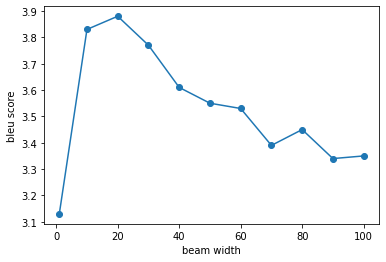

In [26]:
import matplotlib.pyplot as plt
import re

beams = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bleus = []
for i in beams:
    with open('../data/ch10/95_bleu_' + str(i) + '.txt') as f:
        x = f.readlines()[1]
        bleus.append(float(re.search(r'(BLEU4 = )(\d*\.\d*)(,)', x)[2]))

plt.plot(beams, bleus, marker="o")
plt.xlabel('beam width')
plt.ylabel('bleu score')
plt.show()